In [1]:
# This is numerical calculation scripts for the SIN-R @XSSD
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, sqrt, log, sinh, cosh, tanh

In [2]:
test = open('test')
lines = test.read()
print(lines)
test.close

Inin Nose 
0  NHL
0 = 0 * DOFn + 0
 Q1[j] = 1 ovQ1[j] = 1.0 / Q1[j] = 1 Q2[j] = temp  = 1 ovQ2[j] = 1.0/ Q2[j] = 1 fric[0] = 0.1 or 0.1
1  NHL
1 = 1 * DOFn + 0
 Q1[j] = 1 ovQ1[j] = 1.0 / Q1[j] = 1 Q2[j] = temp  = 1 ovQ2[j] = 1.0/ Q2[j] = 1 fric[1] = 0.1 or 0.1
2  NHL
2 = 2 * DOFn + 0
 Q1[j] = 1 ovQ1[j] = 1.0 / Q1[j] = 1 Q2[j] = temp  = 1 ovQ2[j] = 1.0/ Q2[j] = 1 fric[2] = 0.1 or 0.1
3  NHL
3 = 3 * DOFn + 0
 Q1[j] = 1 ovQ1[j] = 1.0 / Q1[j] = 1 Q2[j] = temp  = 1 ovQ2[j] = 1.0/ Q2[j] = 1 fric[3] = 0.1 or 0.1
------------------INIT Nose ends here---------------------
R[0] = 1.69384604858649 V[0] = 0.3491656764588656
MOVE Nose begins here
This is No._0Suzuki Yolanda Factorisation
This is No._0RESPA Factorisation
h_sum B4(indND = -1744922608) = 0
v1[0] = 0.1
 g = -0.99
v2[0] = 1
tsy[0] = 0.001351207191959658
v2[0] = 0.9993311524399799
ev2 = 0.997303036477612
h_sum @ (indND = 0) = 0.009973030364776122
0.009973030364776122
h_sum B4(indND = 0) = 0.009973030364776122
v1[1] = 0.1
 g = -0.99
v2[1]

<function TextIOWrapper.close()>

In [3]:
temp = 1 #k_B T
beta = 1 / temp
mass = 2
fric = 0.1


In [4]:
%precision 16
wsy = np.zeros(3)
wsy[0] = wsy[2] =1 / ( 2 - 2**(1/3))
wsy[1] = 1 - wsy[0] - wsy[2]
print('suzuki-yolanda weight',wsy)
dt = 0.01
nres = 5
tsy = 0.5 * dt / nres * wsy
print('suzuki-yolanda time scale', tsy)

suzuki-yolanda weight [ 1.3512071919596578 -1.7024143839193155  1.3512071919596578]
suzuki-yolanda time scale [ 0.0013512071919597 -0.0017024143839193  0.0013512071919597]


### MOVE_Nose
#### Suzuki-Yolanda 1st

In [5]:
Q1 = 1
Q2 = 1
NHL = 4
v1 = 0.1
v2 = 1
g = (Q1 * v1 * v1 - temp ) / Q2
g

-0.9900000000000000

g checked right 

In [7]:
v2 = 1
v2 += tsy[0] * 0.5 * g
v2,'1.272307902827019'

(0.9993311524399799, '1.272307902827019')

"v2[0] = 0.9993311524399799"

In [8]:
ev2 = np.zeros(NHL)
ev2[0] = exp( - v2 * tsy[0] * 2.0)
ev2[0]

0.997303036477612

ev2 = 0.997303036477612

In [9]:
h_sum = np.zeros(NHL)
h_sum[0] = Q1 * v1 * v1 * ev2[0]
h_sum[0]

0.009973030364776122

In [10]:
v1 = 0.1
g = (Q1 * v1 *v1- temp)/Q2

In [11]:
g

-0.9900000000000000

In [12]:
v2 = 1
v2 += tsy[0] * 0.5 * g
v2, 'v2[1] = 0.9993311524399799'

(0.9993311524399799, 'v2[1] = 0.9993311524399799')

In [13]:
h=h_sum[0]*4
h = h * NHL / (NHL + 1)
h,'h_sum = 0.03191369716728359'

(0.03191369716728359, 'h_sum = 0.03191369716728359')

"V[0] = 0.3491656764588656"

In [14]:
V = .3491656764588656
H = sqrt(NHL * temp /( h + mass * V * V ))
H,'h = 3.808680732421416'

(3.8086807324214162, 'h = 3.808680732421416')

In [15]:
v2 

0.9993311524399799

In [16]:
v1 = 0.1
v1 *= (H * exp(- tsy[0]* v2))
v1,'v1[0] = 0.3803541328383698'

(0.38035413283836983, 'v1[0] = 0.3803541328383698')

'v1[0] = 0.3798408859417653'

In [17]:
g = (Q1 * v1 * v1 - temp)/Q2
print(g,v2)
v2 += tsy[0] * 0.5 * g
print(v2,'g = -0.8553307336327718, v2[0] = 0.9987532879205856')

-0.8553307336327717 0.9993311524399799
0.9987532879205856 g = -0.8553307336327718, v2[0] = 0.9987532879205856


### End of RESPA No.1


### MOVE_Nose_V
#### DT2 = dt
R[0] = 1.69384604858649

In [18]:
R = 1.69384604858649
omega = 1
Req = 2.33
F = - mass * omega * omega * (R - Req)
F,'F[0] = 1.272307902827019'

(1.2723079028270203, 'F[0] = 1.272307902827019')

'V[0] = 0.3491656764588656'

In [19]:
print(V)
g = NHL * temp
a = F * V / g
b = F * F / mass / g
print(a,b, 'a = 0.1110615623886392, b = 0.202345924949511')

0.3491656764588656
0.11106156238863929 0.2023459249495113 a = 0.1110615623886392, b = 0.202345924949511


In [20]:
rb = sqrt(b)
DT2 = dt /2
arg = (DT2) * rb
print(arg)
st = (1.0 / rb) * np.sinh(arg) + ( a / b)* (np.cosh(arg) - 1)
sdot = cosh(arg) + (a / rb) * sinh(arg)
print(st,sdot,'s = 0.0050013924856562, sdot = 1.000557837605256')

0.0022491438646155527
0.0050013924856562005 1.0005578376052557 s = 0.0050013924856562, sdot = 1.000557837605256


In [21]:

V = (V + F / mass * st) / sdot
V,"V[0] = 0.3521508890425535"

(0.3521508890425534, 'V[0] = 0.3551162624637322')

In [28]:
v1 = 0.9689567026750682
v1 = v1 / sdot
print(v1,'v1[0] = 0.9684164835429984')

0.9684164835429984 v1[0] = 0.9684164835429984


In [25]:
test = open('testNose')
lines = test.read()
print(lines)
test.close

Inin Nose 
0  NHL
0 = 0 * DOFn + 0
 Q1[j] = 1 ovQ1[j] = 1.0 / Q1[j] = 1 Q2[j] = temp  = 1 ovQ2[j] = 1.0/ Q2[j] = 1 fric[0] = 0.1 or 0.1
1  NHL
1 = 1 * DOFn + 0
 Q1[j] = 1 ovQ1[j] = 1.0 / Q1[j] = 1 Q2[j] = temp  = 1 ovQ2[j] = 1.0/ Q2[j] = 1 fric[1] = 0.1 or 0.1
2  NHL
2 = 2 * DOFn + 0
 Q1[j] = 1 ovQ1[j] = 1.0 / Q1[j] = 1 Q2[j] = temp  = 1 ovQ2[j] = 1.0/ Q2[j] = 1 fric[2] = 0.1 or 0.1
3  NHL
3 = 3 * DOFn + 0
 Q1[j] = 1 ovQ1[j] = 1.0 / Q1[j] = 1 Q2[j] = temp  = 1 ovQ2[j] = 1.0/ Q2[j] = 1 fric[3] = 0.1 or 0.1
------------------INIT Nose ends here---------------------
R[0] = 1.69384604858649 V[0] = 0.3491656764588656
MOVE Nose begins here
F[0] = 1.272307902827019
V[0] = 0.3491656764588656
a = 0.1110615623886392
b = 0.202345924949511
arg = 
v1[0] = 0.9689567026750682
 s = 0.0050013924856562
sdot = 1.000557837605256
v1[1] = 0.9689567026750682
 s = 0.0050013924856562
sdot = 1.000557837605256
v1[2] = 0.9689567026750682
 s = 0.0050013924856562
sdot = 1.000557837605256
v1[3] = 0.9689567026750682


<function TextIOWrapper.close()>

In [29]:
config = np.loadtxt('config')
config[0]

array([ 2.158570021644011 , -0.6402033060121409])

In [38]:
x = config[:,0]
p = config[:,1]*mass

[]

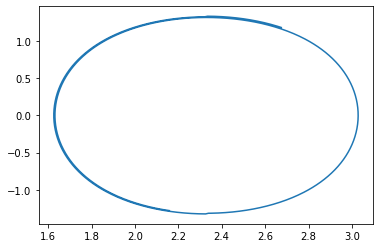

In [39]:
plt.plot(x[:1000],p[:1000])
plt.plot()

[]

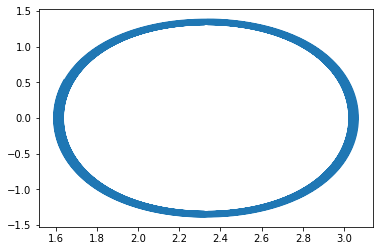

In [40]:
plt.plot(x[:100000],p[:100000])
plt.plot()

[]

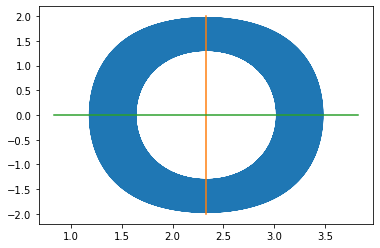

In [49]:
plt.plot(x[:1000000],p[:1000000])
plt.plot(np.zeros(1000)+2.33,np.arange(-2,2,(2+2)/1000))
plt.plot(np.arange(-1.5,1.5,3/1000)+2.33,np.zeros(1000))
plt.plot()

In [70]:
ene1traj = np.loadtxt('ene_1traj')
ene1traj[1]

array([1.041293224638292 , 0.4845334510207478, 0.5567597736175446])

In [71]:
E = ene1traj[:,0]
PE = ene1traj[:,1]
KE = ene1traj[:,2]


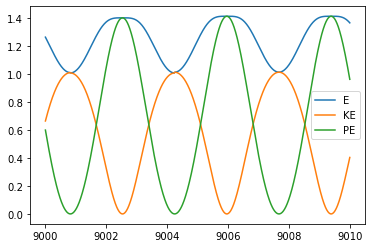

In [72]:
at = np.arange(0,len(ene1traj)*0.01,0.01)

plt.plot(at[900000:901000],E[900000:901000],label = 'E')
plt.plot(at[900000:901000],KE[900000:901000],label='KE')
plt.plot(at[900000:901000],PE[900000:901000],label='PE')
plt.legend()

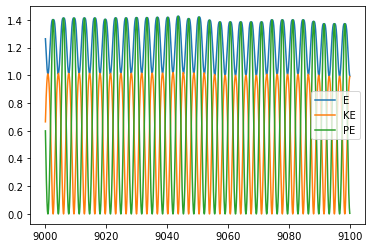

In [73]:
at = np.arange(0,len(ene1traj)*0.01,0.01)

plt.plot(at[900000:910000],E[900000:910000],label = 'E')
plt.plot(at[900000:910000],KE[900000:910000],label='KE')
plt.plot(at[900000:910000],PE[900000:910000],label='PE')
plt.legend()

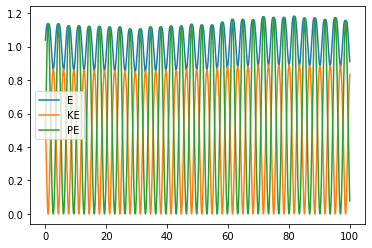

In [74]:
at = np.arange(0,len(ene1traj)*0.01,0.01)

plt.plot(at[:10000],E[:10000],label = 'E')
plt.plot(at[:10000],KE[:10000],label='KE')
plt.plot(at[:10000],PE[:10000],label='PE')
plt.legend()

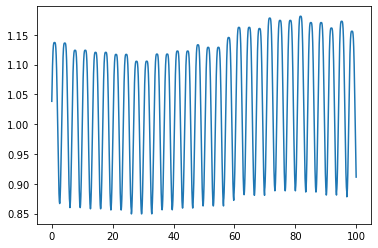

In [78]:
plt.plot(at[:10000],E[:10000])

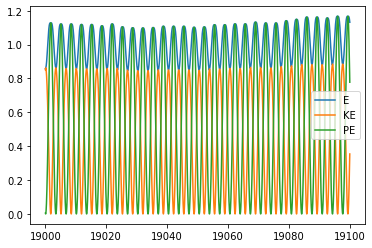

In [75]:
at = np.arange(0,len(ene1traj)*0.01,0.01)

plt.plot(at[1900000:1910000],E[1900000:1910000],label = 'E')
plt.plot(at[1900000:1910000],KE[1900000:1910000],label='KE')
plt.plot(at[1900000:1910000],PE[1900000:1910000],label='PE')
plt.legend()

(-5.0000000000000000, 5.0000000000000000)

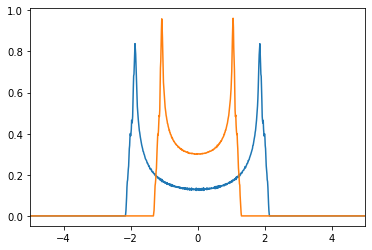

In [89]:
dist1traj = np.loadtxt("dist_one_traj")
dist1traj[1]
posi = dist1traj[:,0]
momenta = dist1traj[:,1]
plt.plot(np.arange(-50,50,0.01),momenta/sum(momenta)/0.01)
plt.plot(np.arange(-50,50,0.01),posi/sum(posi)/0.01)
plt.xlim(-5,5)


In [50]:
x = np.arange(-50,50,0.01)
p = np.arange(-50,50,0.01)
mass = 2
omega = 1

beta = 1
Zx = sum(exp( - 0.5 * beta * (mass * omega * omega * x * x)))
Zp = sum(exp(- 0.5 * beta * (p * p / (2*mass)) ))
print(Zx,Zp)

177.24538509058678 501.32565492629874


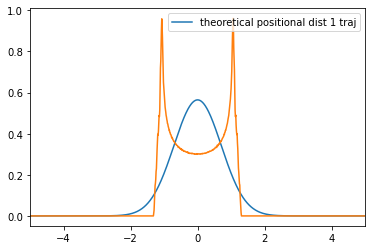

In [90]:
plt.plot(x,exp( - 0.5 * beta * (mass * omega * omega * x * x))/Zx/0.01,label='theoretical positional dist 1 traj')
plt.plot(np.arange(-50,50,0.01),posi/sum(posi)/0.01,label='simulated ')
plt.plot()
plt.xlim(-5,5)
plt.legend()

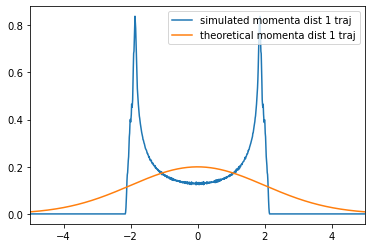

In [93]:
p = np.arange(-50,50,0.01)

plt.plot(np.arange(-50,50,0.01),momenta/sum(momenta)/0.01,label='simulated momenta dist 1 traj')
plt.plot(p,exp(- 0.5 * beta * (p * p / (2*mass)) )/Zp/0.01,label='theoretical momenta dist 1 traj')

plt.plot()
plt.xlim(-5,5)
plt.legend()

In [122]:
lines = []
f = open('dist_100tr')
lines = f.readlines()
f.close()
print(len(lines))
a = lines[len(lines)-10000:len(lines)]

19971442


In [124]:
a[1]

'0  1\n'

(-5.0000000000000000, 5.0000000000000000)

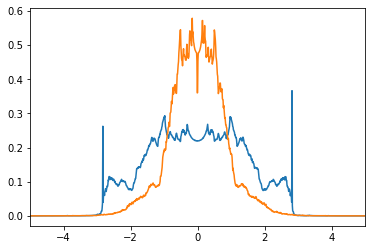

In [125]:
#dist100traj = np.loadtxt(lines[100:10100])
dist100traj=np.loadtxt(a)
dist100traj[1]
posi = dist100traj[:,0]
momenta = dist100traj[:,1]
plt.plot(np.arange(-50,50,0.01),momenta/sum(momenta)/0.01)
plt.plot(np.arange(-50,50,0.01),posi/sum(posi)/0.01)
plt.xlim(-5,5)


those graphs above are given in the 100000 per traj for production run above

ones below are given in 10000 per traj

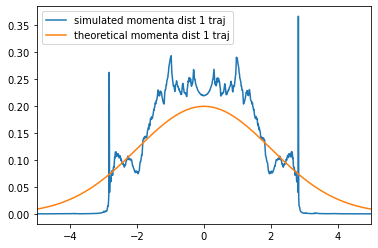

In [126]:
p = np.arange(-50,50,0.01)

plt.plot(np.arange(-50,50,0.01),momenta/sum(momenta)/0.01,label='simulated momenta dist 100 traj')
plt.plot(p,exp(- 0.5 * beta * (p * p / (2*mass)) )/Zp/0.01,label='theoretical momenta dist 100 traj')

plt.plot()
plt.xlim(-5,5)
plt.legend()

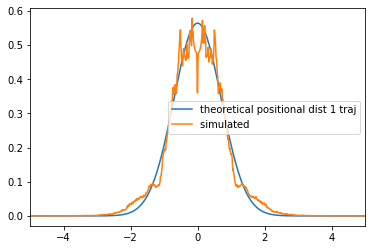

In [127]:
x = np.arange(-50,50,0.01)

plt.plot(x,exp( - 0.5 * beta * (mass * omega * omega * x * x))/Zx/0.01,label='theoretical positional dist 100 traj')
plt.plot(np.arange(-50,50,0.01),posi/sum(posi)/0.01,label='simulated ')
plt.plot()
plt.xlim(-5,5)
plt.legend()

(-5.0000000000000000, 5.0000000000000000)

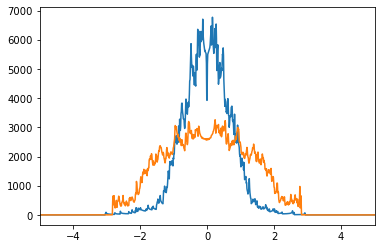

In [128]:
simu100s = np.loadtxt('dist_100trr')
posit = simu100s[:,0]
momen = simu100s[:,1]
plt.plot(x,posit)
plt.plot(p,momen)
plt.xlim(-5,5)

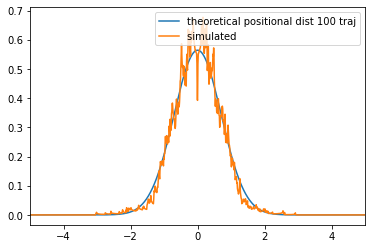

In [131]:
x = np.arange(-50,50,0.01)

plt.plot(x,exp( - 0.5 * beta * (mass * omega * omega * x * x))/Zx/0.01,label='theoretical positional dist 100 traj')
plt.plot(np.arange(-50,50,0.01),posit/sum(posit)/0.01,label='simulated ')
plt.plot()
plt.xlim(-5,5)
plt.legend()

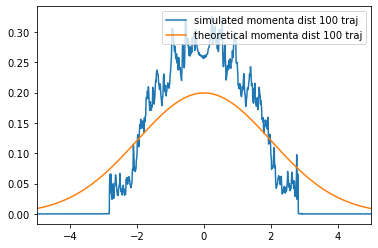

In [130]:
p = np.arange(-50,50,0.01)

plt.plot(np.arange(-50,50,0.01),momen/sum(momen)/0.01,label='simulated momenta dist 100 traj')
plt.plot(p,exp(- 0.5 * beta * (p * p / (2*mass)) )/Zp/0.01,label='theoretical momenta dist 100 traj')

plt.plot()
plt.xlim(-5,5)
plt.legend()